<a href="https://colab.research.google.com/github/jamie07262/INFO-2602-LAB1/blob/main/models/Logisitic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import re
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

In [2]:
# Define GitHub paths
github_url = "https://github.com/jamie07262/INFO-3608-PROJECT/tree/main/data/processed"
processed_url_prefix = "https://raw.githubusercontent.com/jamie07262/INFO-3608-PROJECT/main/data/processed/"

# Get the HTML content of the folder
response = requests.get(github_url)
html = response.text

# Extract CSV filenames and remove duplicates
csv_files = list(set(re.findall(r'href=".*?/data/processed/([^"]+\.csv)"', html)))

# Create the directory and download the files
!mkdir -p processed
for file in csv_files:
    url = processed_url_prefix + file
    !wget -q -P processed {url}
    print(f"Downloaded: {file}")

print("All CSV files downloaded successfully.")

Downloaded: Features.csv
All CSV files downloaded successfully.


In [3]:
df_features = pd.read_csv("processed/Features.csv")
df_features

,Season,Divison,TeamID,OpponentTeamID,TeamScore,OpponentScore,GameResult,Win,WinPercentage,MedianScoreDifference,...,OpponentWinPercentage,OpponentMedianScoreDifference,OpponentHighSeed,WinPercentageDifference,HighSeedDifference,MedianScoreDifferenceDifference,538rating,538ratingOpponent,538rating_Difference,BaselinePred
0,2016,M,1195,1192,96,65,W,1,0.551724,2.0,...,0.548387,2.0,16.0,0.003337,0.0,0.0,71.41,66.72,4.69,True
1,2016,M,1455,1435,70,50,W,1,0.741935,17.0,...,0.593750,10.0,11.0,0.148185,0.0,7.0,86.59,85.59,1.00,True
2,2016,M,1221,1380,59,55,W,1,0.424242,-4.0,...,0.612903,4.0,16.0,-0.188661,0.0,-8.0,66.85,67.96,-1.11,False
3,2016,M,1276,1409,67,62,W,1,0.636364,5.0,...,0.645161,8.0,11.0,-0.008798,0.0,-3.0,79.57,79.93,-0.36,False
4,2016,M,1114,1345,85,83,W,1,0.870968,8.0,...,0.764706,13.0,5.0,0.106262,7.0,-5.0,78.90,88.68,-9.78,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,2023,W,3268,3376,75,86,L,0,0.806452,11.0,...,1.000000,28.0,1.0,-0.193548,1.0,-17.0,93.60,110.03,-16.43,False
1830,2023,W,3326,3439,74,84,L,0,0.781250,12.0,...,0.870968,13.0,1.0,-0.089718,2.0,-1.0,91.03,95.72,-4.69,False
1831,2023,W,3376,3234,73,77,L,0,1.000000,28.0,...,0.812500,13.5,2.0,0.187500,-1.0,14.5,110.03,97.19,12.84,True
1832,2023,W,3439,3261,72,79,L,0,0.870968,13.0,...,0.933333,22.0,3.0,-0.062366,-2.0,-9.0,95.72,96.14,-0.42,True


Holdout Season: 2016
Season 2016: Accuracy = 0.7015, Log Loss = 0.5622
Holdout Season: 2017
Season 2017: Accuracy = 0.7313, Log Loss = 0.5234
Holdout Season: 2018
Season 2018: Accuracy = 0.7923, Log Loss = 0.4259
Holdout Season: 2019
Season 2019: Accuracy = 0.7692, Log Loss = 0.4628
Holdout Season: 2021
Season 2021: Accuracy = 0.7077, Log Loss = 0.5259
Holdout Season: 2022
Season 2022: Accuracy = 0.7154, Log Loss = 0.4901
Holdout Season: 2023
Season 2023: Accuracy = 0.7442, Log Loss = 0.5125
Average Accuracy: 0.7374
Average Log Loss: 0.5004


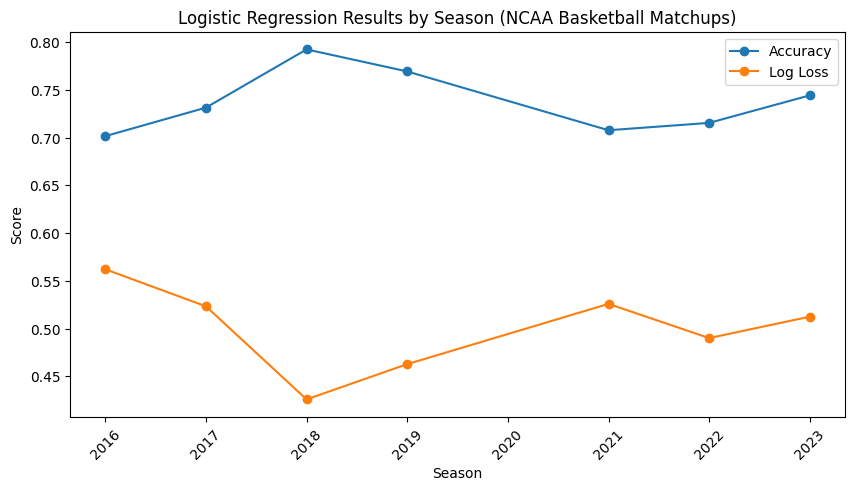

In [4]:
# Define features and target
FEATURES = [
    #     "WinPercentage",
    #     "MedianScoreDifference",
    #     "HighSeed",
    #     "OpponentWinPercentage",
    #     "OpponentMedianScoreDifference",
    #     "OpponentHighSeed",
    "WinPercentageDifference",
    "HighSeedDifference",
    #     "538rating",
    #     "538ratingOpponent",
    "538rating_Difference",
]
TARGET = "Win"

# Prepare data
x = df_features[FEATURES]
y = df_features[TARGET]
groups = df_features["Season"]
seasons = df_features["Season"].unique()

# Set up GroupKFold for cross-validation by season
gkf = GroupKFold(n_splits=len(seasons))

# Initialize model
model = LogisticRegression(max_iter=1337, random_state=42)

# Store Data
cv_results = []
models = []

# Cross-validation loop for performance evaluation
for season_idx, (train_index, test_index) in enumerate(gkf.split(x, y, groups)):
    holdout_season = seasons[season_idx]
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(x_train, y_train)

    holdout_season = seasons[season_idx]
    print(f"Holdout Season: {holdout_season}")

    # Make predictions
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    y_pred_prob = model.predict_proba(x_test)[:, 1]  # Get probability of winning
    log_loss_score = log_loss(y_test, y_pred_prob)

    # Store the results
    cv_results.append({
        "Season": holdout_season,
        "Accuracy": accuracy,
        "LogLoss": log_loss_score
    })

    models.append(model)

    print(f"Season {holdout_season}: Accuracy = {accuracy:.4f}, Log Loss = {log_loss_score:.4f}")

# Convert results to DataFrame
df_cv_results = pd.DataFrame(cv_results)

# Display average performance metrics
print(f"Average Accuracy: {df_cv_results['Accuracy'].mean():.4f}")
print(f"Average Log Loss: {df_cv_results['LogLoss'].mean():.4f}")

# Optional: Plot the results by season
plt.figure(figsize=(10, 5))
plt.plot(df_cv_results['Season'], df_cv_results['Accuracy'], marker='o', label='Accuracy')
plt.plot(df_cv_results['Season'], df_cv_results['LogLoss'], marker='o', label='Log Loss')
plt.xlabel("Season")
plt.ylabel("Score")
plt.title("Logistic Regression Results by Season (NCAA Basketball Matchups)")
plt.legend()
plt.xticks(rotation=45)
plt.show()